In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [50]:
#Formar a base de imagens;

#Ler imagens da pasta
imagens = []
for arquivo in os.listdir():
    if ".jpeg" in arquivo:
        imagem = plt.imread(arquivo)
        imagens.append(imagem)

In [51]:
#Organizar a base em diretórios: Dados + Metadados. Metadados podem ser
#representados de 3 maneiras: 1- nome do arquivo; 2- arquivo txt com o mesmo nome do
#arquivo da img; 3- CSV com metadados

meta_dados = pd.read_csv('meta_dados.csv')

In [52]:
#Criar um jupyter notebook com uma biblioteca de funções para ler a base e visualizá-la
#de uma forma de tabela sumária de dados. Por exemplo, para visualizar a base de
#dados como um todo,

lista_objetos = ['Boné', 'Óculos', 'Adesivo', 'Copo', 'Bola', 'Tesoura', 'Fone', 'Mouse', 'Pente', 'Relógio']

lista_classe = []

for objeto in lista_objetos:
    df_objeto = meta_dados[(meta_dados['1_classe'] == objeto) | (meta_dados['2_classe'] == objeto) | (meta_dados['3_classe'] == objeto) | (meta_dados['4_classe'] == objeto) | (meta_dados['5_classe'] == objeto)]
    lista_imagens_objeto = list(df_objeto['nome_arquivo'])

    #Ler imagens da pasta
    imagens = []
    for arquivo in lista_imagens_objeto:
        if ".jpeg" in arquivo:
            imagem = plt.imread(arquivo)
            imagens.append(imagem)

    shapes = np.array([imagem.shape for imagem in imagens])
    max_width = shapes[:, 1].max()
    total_height = shapes[:, 0].sum()
    
    imagem_combinada = np.zeros((total_height, max_width, 3), dtype=np.uint8)
    
    y_offset = 0
    for imagem in imagens:
        height, width, _ = imagem.shape
        imagem_combinada[y_offset:y_offset+height, :width] = imagem
        y_offset += height
    
    lista_classe.append(imagem_combinada)

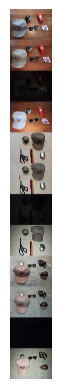

In [53]:
#Fotos com boné
plt.imshow(lista_classe[0])
plt.axis('off')
plt.show()

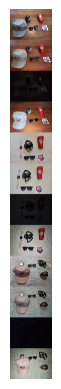

In [54]:
#Fotos com Óculos
plt.imshow(lista_classe[1])
plt.axis('off')
plt.show()

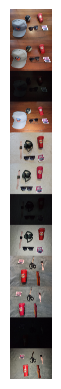

In [55]:
#Fotos com Adesivo
plt.imshow(lista_classe[2])
plt.axis('off')
plt.show()

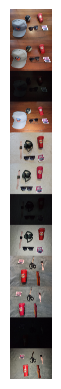

In [56]:
#Fotos com Copo
plt.imshow(lista_classe[3])
plt.axis('off')
plt.show()

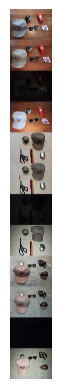

In [57]:
#Fotos com Bola
plt.imshow(lista_classe[4])
plt.axis('off')
plt.show()

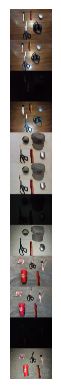

In [58]:
#Fotos com Tesoura
plt.imshow(lista_classe[5])
plt.axis('off')
plt.show()

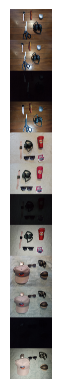

In [59]:
#Fotos com Fone
plt.imshow(lista_classe[6])
plt.axis('off')
plt.show()

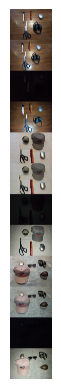

In [60]:
#Fotos com Mouse
plt.imshow(lista_classe[7])
plt.axis('off')
plt.show()

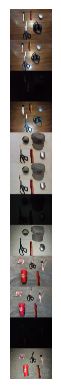

In [61]:
#Fotos com Pente
plt.imshow(lista_classe[8])
plt.axis('off')
plt.show()

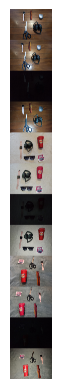

In [62]:
#Fotos com Relógio
plt.imshow(lista_classe[9])
plt.axis('off')
plt.show()

In [63]:
#Criar um jupyter notebook para ler a base e mostrar uma Tabela Sumária dos Dados e
#Tabela Detalhada por Classe

df_detalhe_classes = pd.DataFrame()

for objeto in lista_objetos:
    df_objeto = meta_dados[(meta_dados['1_classe'] == objeto) | (meta_dados['2_classe'] == objeto) | (meta_dados['3_classe'] == objeto) | (meta_dados['4_classe'] == objeto) | (meta_dados['5_classe'] == objeto)]
    contagem_fundo = len(df_objeto['fundo'].drop_duplicates())
    contagem_iluminacao = len(df_objeto['iluminacao'].drop_duplicates())
    qtdd_amostra = len(df_objeto['fundo'])
    df_detalhe_classe = pd.DataFrame({'classe': [objeto], 'contagem_fundo': [contagem_fundo], 'contagem_iluminacao': contagem_iluminacao, 'total_amostra': qtdd_amostra})
    df_detalhe_classes = pd.concat([df_detalhe_classes,df_detalhe_classe])
df_detalhe_classes

,classe,contagem_fundo,contagem_iluminacao,total_amostra
0,Boné,3,4,12
0,Óculos,3,4,12
0,Adesivo,3,4,12
0,Copo,3,4,12
0,Bola,3,4,12
0,Tesoura,3,4,12
0,Fone,3,4,12
0,Mouse,3,4,12
0,Pente,3,4,12
0,Relógio,3,4,12
